In [170]:
import requests
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [171]:
from scipy.cluster.vq import whiten, kmeans2

In [172]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'f6b6960d8ade48dc8278f0f7788dc041' }).json()
        return json
    except:
        json
        return None

In [173]:
# Получаем набор данных по API. Выберем API leagueTable (таблица Лиги соревнований 'Bundesliga 2017/2018' )
league_table = call_api('http://api.football-data.org/v1/competitions/452/leagueTable', 'table')
league_table

{'_links': {'competition': {'href': 'http://api.football-data.org/v1/competitions/452'},
  'self': {'href': 'http://api.football-data.org/v1/competitions/452/leagueTable/?matchday=24'}},
 'leagueCaption': '1. Bundesliga 2017/18',
 'matchday': 24,
 'standing': [{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/5'}},
   'away': {'draws': 1,
    'goals': 21,
    'goalsAgainst': 9,
    'losses': 2,
    'wins': 9},
   'crestURI': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
   'draws': 3,
   'goalDifference': 37,
   'goals': 55,
   'goalsAgainst': 18,
   'home': {'draws': 2,
    'goals': 34,
    'goalsAgainst': 9,
    'losses': 0,
    'wins': 10},
   'losses': 2,
   'playedGames': 24,
   'points': 60,
   'position': 1,
   'teamName': 'FC Bayern München',
   'wins': 19},
  {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/4'}},
   'away': {'draws': 4,
    'goals': 21,
    'goalsAgainst': 13,
    'losses': 2,
    'wins

In [174]:
# Получим данные по командам, участвующим в игре. 
team = call_api('http://api.football-data.org/v1/competitions/452/teams', 'team')
team

{'_links': {'competition': {'href': 'http://api.football-data.org/v1/competitions/452'},
  'self': {'href': 'http://api.football-data.org/v1/competitions/452/teams'}},
 'count': 18,
 'teams': [{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/5/fixtures'},
    'players': {'href': 'http://api.football-data.org/v1/teams/5/players'},
    'self': {'href': 'http://api.football-data.org/v1/teams/5'}},
   'code': 'FCB',
   'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
   'name': 'FC Bayern München',
   'shortName': 'Bayern',
   'squadMarketValue': None},
  {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/3/fixtures'},
    'players': {'href': 'http://api.football-data.org/v1/teams/3/players'},
    'self': {'href': 'http://api.football-data.org/v1/teams/3'}},
   'code': 'B04',
   'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/5/59/Bayer_04_Leverkusen_logo.svg',
   'name': 'Bayer Leverkusen',
 

In [175]:
# Получим список словарей (название команды, кол-во проигрышей, кол-во побед)
team_pd = []
for _ in table['standing']:
    team_pd.append({'team': _['teamName'], 'losses': _['losses'], 'wins': _['wins']})
team_pd
# len(team_pd)

[{'losses': 2, 'team': 'FC Bayern München', 'wins': 19},
 {'losses': 5, 'team': 'Borussia Dortmund', 'wins': 11},
 {'losses': 6, 'team': 'FC Schalke 04', 'wins': 11},
 {'losses': 7, 'team': 'Eintracht Frankfurt', 'wins': 11},
 {'losses': 6, 'team': 'Bayer Leverkusen', 'wins': 10},
 {'losses': 8, 'team': 'Red Bull Leipzig', 'wins': 11},
 {'losses': 10, 'team': 'Bor. Mönchengladbach', 'wins': 10},
 {'losses': 8, 'team': 'FC Augsburg', 'wins': 8},
 {'losses': 8, 'team': 'TSG 1899 Hoffenheim', 'wins': 8},
 {'losses': 8, 'team': 'Hannover 96', 'wins': 8},
 {'losses': 7, 'team': 'Hertha BSC', 'wins': 7},
 {'losses': 12, 'team': 'VfB Stuttgart', 'wins': 9},
 {'losses': 7, 'team': 'SC Freiburg', 'wins': 6},
 {'losses': 10, 'team': 'Werder Bremen', 'wins': 6},
 {'losses': 7, 'team': 'VfL Wolfsburg', 'wins': 4},
 {'losses': 12, 'team': '1. FSV Mainz 05', 'wins': 6},
 {'losses': 15, 'team': 'Hamburger SV', 'wins': 4},
 {'losses': 15, 'team': '1. FC Köln', 'wins': 4}]

In [176]:
# Представим в форме таблицы:
teams_pd = pd.DataFrame(team_pd)
teams_pd

,losses,team,wins
0,2,FC Bayern München,19
1,5,Borussia Dortmund,11
2,6,FC Schalke 04,11
3,7,Eintracht Frankfurt,11
4,6,Bayer Leverkusen,10
5,8,Red Bull Leipzig,11
6,10,Bor. Mönchengladbach,10
7,8,FC Augsburg,8
8,8,TSG 1899 Hoffenheim,8
9,8,Hannover 96,8


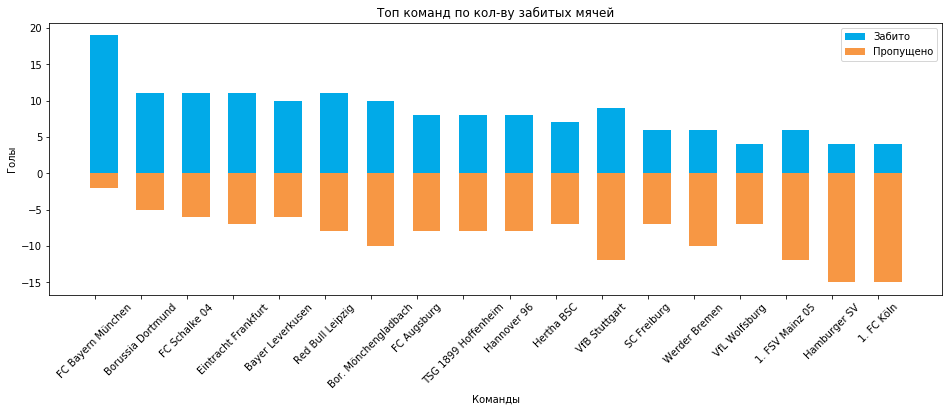

In [177]:
# Построим диаграмму забитых голов/проигрышей методом subplots
bar_width = 0.6
teams_pd = teams_pd.reindex(columns=['team', 'wins', 'losses'])

fig, ax = plt.subplots(figsize=[16, 5])
ax.bar(teams_pd.index + 0.2, teams_pd.wins, bar_width, color='#01aae8', label='Забито')
ax.bar(teams_pd.index + 0.2, -teams_pd.losses, bar_width, color='#f79744', label='Пропущено')
ax.set_xticks(teams_pd.index)
ax.set_xticklabels(teams_pd.team, rotation=45)
ax.set_ylabel('Голы')
ax.set_xlabel('Команды')
ax.set_title('Топ команд по кол-ву забитых мячей')
ax.legend()
plt.grid(False)
plt.show()

In [178]:
# Требуется найти стоимость команды. Из данных мы получили {'squadMarketValue': None} по id каждой команды.
# Проведем расчет стоимости команды с помощью генератора случайных чисел.
cost_team = [random.randint(88000000, 400000000) for i in range(len(teams_pd))] 
cost_pd = pd.DataFrame(cost_team, columns=['squadMarketValue']) # добавим столбец Price
teams_pd = teams_pd.assign(squadMarketValue=cost_pd.values, Value='EURO')
teams_pd

,team,wins,losses,squadMarketValue,Value
0,FC Bayern München,19,2,264639922,EURO
1,Borussia Dortmund,11,5,111852807,EURO
2,FC Schalke 04,11,6,173951811,EURO
3,Eintracht Frankfurt,11,7,255165830,EURO
4,Bayer Leverkusen,10,6,345008316,EURO
5,Red Bull Leipzig,11,8,125527618,EURO
6,Bor. Mönchengladbach,10,10,261357270,EURO
7,FC Augsburg,8,8,235453429,EURO
8,TSG 1899 Hoffenheim,8,8,333411791,EURO
9,Hannover 96,8,8,271427302,EURO


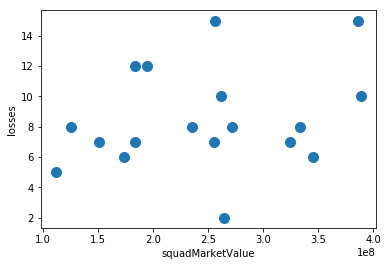

In [179]:
# Построим точечную диаграмму:
teams_pd.plot.scatter(x='squadMarketValue', y='losses', s=100)

In [180]:
# Оставим только интересующие нас столбцы - losses, squadMarketValue
losses_and_cost = pd.DataFrame(teams_pd, columns=['losses','squadMarketValue'])
losses_and_cost

,losses,squadMarketValue
0,2,264639922
1,5,111852807
2,6,173951811
3,7,255165830
4,6,345008316
5,8,125527618
6,10,261357270
7,8,235453429
8,8,333411791
9,8,271427302


In [181]:
# del teams_pd['Team']
# teams_pd

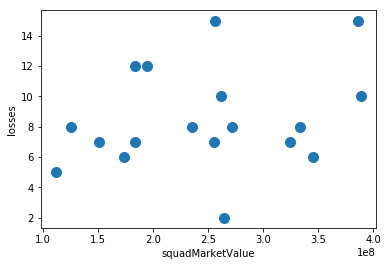

In [182]:
# Построим точечную диаграмму 
losses_and_cost.plot.scatter(x='squadMarketValue', y='losses', s=100)

In [183]:
# Нормализация данных (в форме массива)
whitened = whiten(losses_and_cost.as_matrix())
whitened

array([[0.61477862, 3.20979356],
       [1.53694656, 1.35665253],
       [1.84433587, 2.1098457 ],
       [2.15172518, 3.09488316],
       [1.84433587, 4.18457451],
       [2.45911449, 1.52251307],
       [3.07389312, 3.16997857],
       [2.45911449, 2.85579324],
       [2.45911449, 4.04392131],
       [2.45911449, 3.29211707],
       [2.15172518, 1.83027054],
       [3.68867174, 2.2314174 ],
       [2.15172518, 2.22461552],
       [3.07389312, 4.71314476],
       [2.15172518, 3.93543794],
       [3.68867174, 2.36286845],
       [4.61083968, 3.11224009],
       [4.61083968, 4.68955413]])

In [184]:
# Сделаем 3 кластера
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[2.01998691, 3.51664583],
        [2.02876946, 1.80877947],
        [3.79113484, 3.37986723]]),
 array([0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2]))

In [185]:
# Зададим цвета для каждого кластера
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

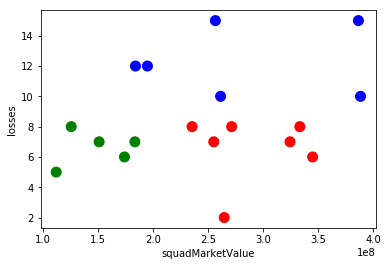

In [186]:
# Строим точечную диаграмму - распределение кластеров
losses_and_cost.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)

In [187]:
# Сделаем 5 кластеров
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[2.37128898, 3.51095797],
        [3.99606105, 2.56884198],
        [3.8423664 , 4.70134944],
        [2.02876946, 1.80877947],
        [0.61477862, 3.20979356]]),
 array([4, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 1, 3, 2, 0, 1, 1, 2]))

In [188]:
# Зададим цвета для каждого кластера
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

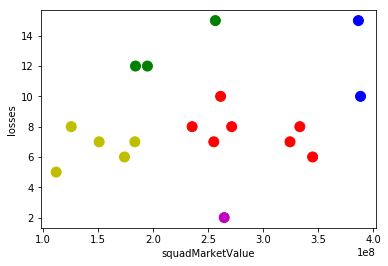

In [189]:
# Строим точечную диаграмму - распределение кластеров
losses_and_cost.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)